# Decision Tree Classifier Implementation by using Post Pruning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [13]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target'] = iris.target

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df.columns = df.columns.str.replace(" (cm)","")

In [21]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
# Spliting the dataset into independent and dependent features
x = df.iloc[:,:-1]
y = df['target']

In [28]:
# Spliting the dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=42)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [34]:
# Model Training
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [35]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

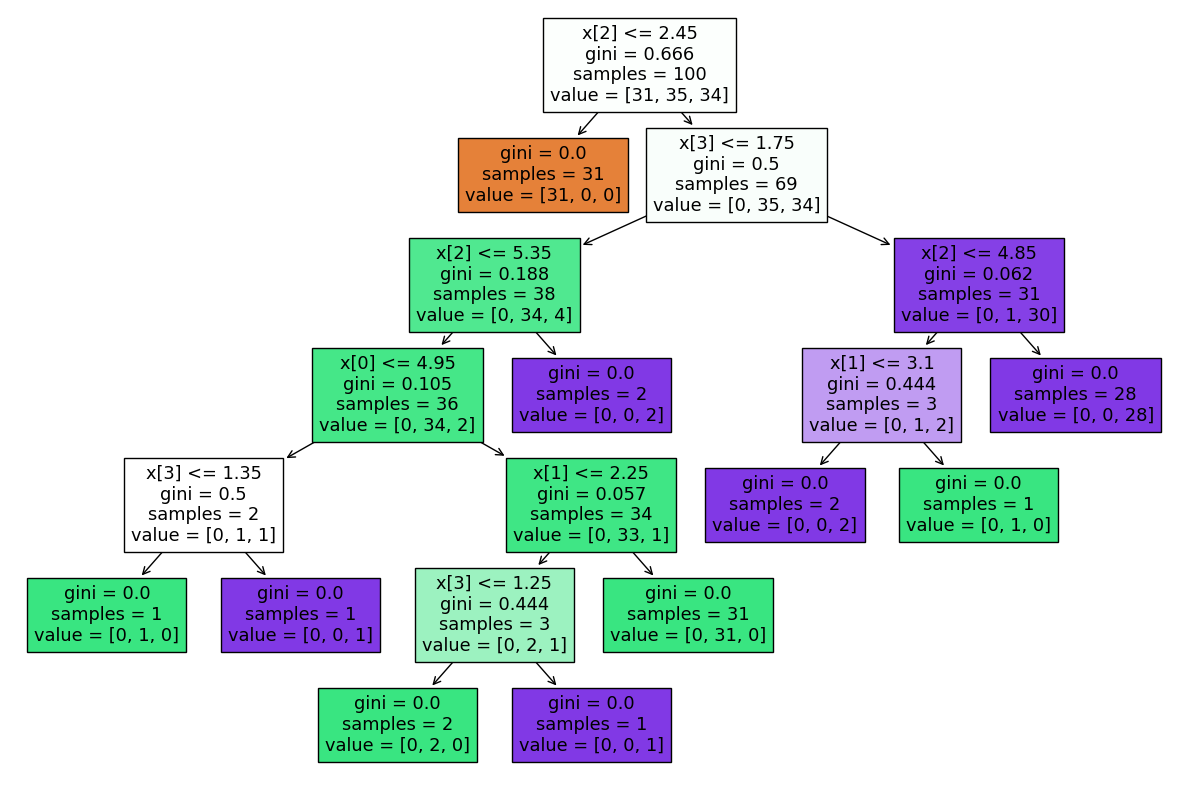

In [39]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(dtc,filled = True)
plt.show()

In [40]:
# Post Pruning
dtc = DecisionTreeClassifier(max_depth = 2)

In [42]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

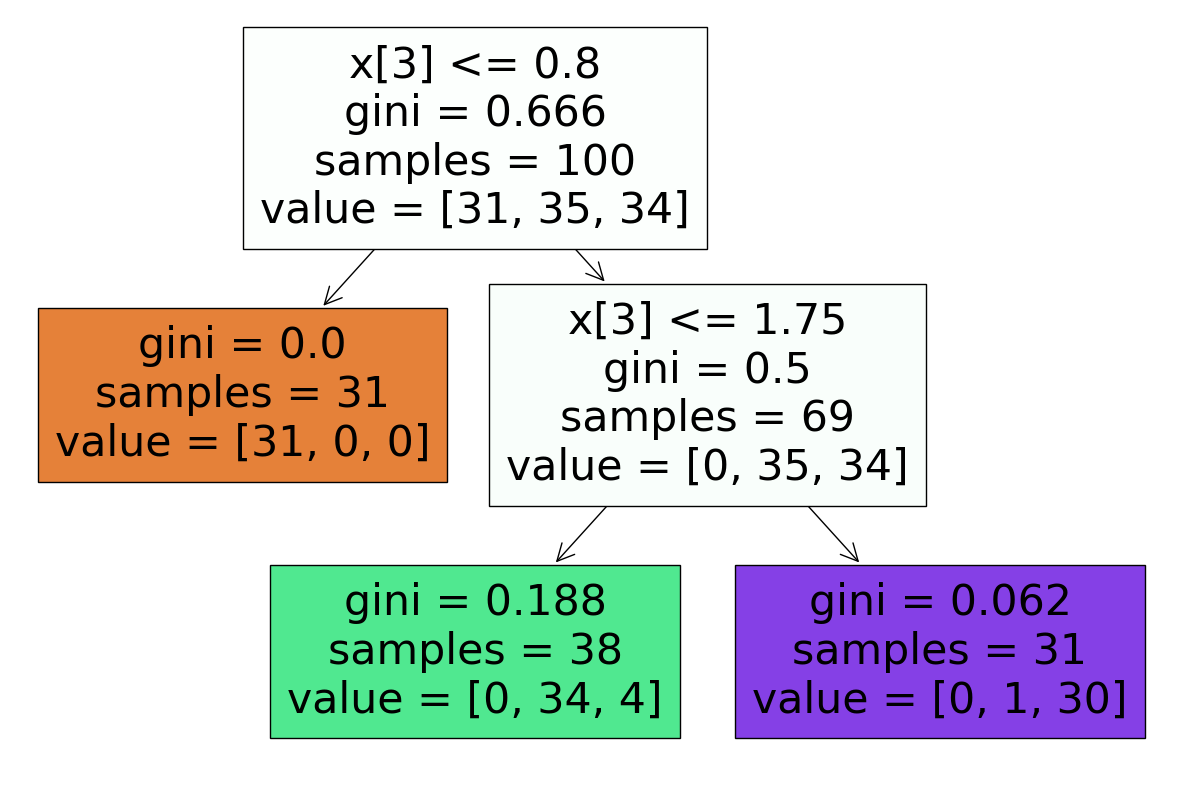

In [45]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled = True)
plt.show()

In [46]:
y_pred = dtc.predict(x_test)

In [49]:
# Accuracy Checking
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
print(accuracy_score(y_pred,y_test))

0.98


In [50]:
print(confusion_matrix(y_pred,y_test))

[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]


# Decision Tree Classifier Implementation using Pre Pruning

In [51]:
import warnings 
warnings.filterwarnings('ignore')

In [55]:
from sklearn.model_selection import GridSearchCV

In [53]:
parameter = {'criterion':["gini","entropy","log_loss"],
            'splitter':['best','random'],
            'max_depth':[1,2,3,4,5]}

In [56]:
clf = GridSearchCV(dtc,param_grid=parameter)

In [57]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [61]:
clf.best_params_

{'criterion': 'log_loss', 'max_depth': 2, 'splitter': 'random'}

In [62]:
clf.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 1, 1, 2, 1, 2])

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [64]:
print(accuracy_score(y_pred,y_test))

0.98


In [65]:
print(confusion_matrix(y_pred,y_test))

[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]
